In [1]:
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D
from scipy.ndimage.filters import gaussian_filter1d
from netCDF4 import Dataset
import xarray
import pyart
import palettable
import scipy.ndimage as ndimage
from scipy.ndimage.filters import gaussian_filter
from scipy.interpolate import make_interp_spline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import num2date
import metpy
import glob,os
from siphon.catalog import TDSCatalog
from scipy import interpolate
import scipy
import statsmodels

#My script
import ceilometer_help
import peak_finding
import display


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
read_folder = "/scra6/ft21894/py_script/TAHOPE/Data/NTU_CL31/dryrun/"
filelist = sorted(glob.glob(read_folder+'*.nc'))
print('CL31 files:', filelist)

data = []
for i in range(len(filelist)):
    data.append(xarray.open_dataset(filelist[i]))
    
time_utc = []
backscatter = []
cbh_1 = []
cbh_2 = []
cbh_3 = []
level = data[0]['level']
for i in range(len(filelist)):
    time_utc.append(data[i]['time_utc'])
    backscatter.append(data[i]['backscatter'])
    cbh_1.append(data[i]['cbh_1'])
    cbh_2.append(data[i]['cbh_2'])
    cbh_3.append(data[i]['cbh_3'])

cbh1_smpl = np.array([])
cbh2_smpl = np.array([])
cbh3_smpl = np.array([])
time_smpl = np.array([])
backscatter_smpl = np.concatenate(backscatter,0)
for i in range(len(filelist)):
    print(i)
    cbh1_smpl = np.concatenate([cbh1_smpl,np.asarray(cbh_1[i])],axis=0)
    cbh2_smpl = np.concatenate([cbh2_smpl,np.asarray(cbh_2[i])],axis=0)
    cbh3_smpl = np.concatenate([cbh3_smpl,np.asarray(cbh_3[i])],axis=0)
    time_smpl = np.concatenate([time_smpl,np.asarray(time_utc[i])],axis=0)

/scra6/ft21894/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CL31 files: ['/scra6/ft21894/py_script/TAHOPE/Data/NTU_CL31/dryrun/060114.nc', '/scra6/ft21894/py_script/TAHOPE/Data/NTU_CL31/dryrun/060200.nc', '/scra6/ft21894/py_script/TAHOPE/Data/NTU_CL31/dryrun/060300.nc', '/scra6/ft21894/py_script/TAHOPE/Data/NTU_CL31/dryrun/060400.nc', '/scra6/ft21894/py_script/TAHOPE/Data/NTU_CL31/dryrun/060500.nc', '/scra6/ft21894/py_script/TAHOPE/Data/NTU_CL31/dryrun/060600.nc', '/scra6/ft21894/py_script/TAHOPE/Data/NTU_CL31/dryrun/060700.nc', '/scra6/ft21894/py_script/TAHOPE/Data/NTU_CL31/dryrun/060800.nc', '/scra6/ft21894/py_script/TAHOPE/Data/NTU_CL31/dryrun/060900.nc', '/scra6/ft21894/py_script/TAHOPE/Data/NTU_CL31/dryrun/061000.nc', '/scra6/ft21894/py_script/TAHOPE/Data/NTU_CL31/dryrun/061100.nc', '/scra6/ft21894/py_script/TAHOPE/Data/NTU_CL31/dryrun/061200.nc']
0
1
2
3
4
5
6
7
8
9
10
11


/scra6/ft21894/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


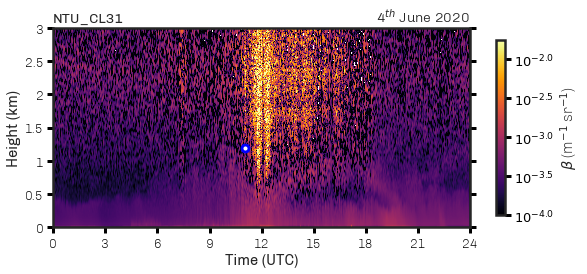

In [10]:
from matplotlib import ticker as ticker
import scipy
import matplotlib.ticker as mticker
import matplotlib
import pyart.graph.cm as pyartcm
from matplotlib.axes import Axes

#hs_cl31_smoo = scipy.signal.wiener(np.asarray(backscatter[3][0:,0:600]),9)
#Plotting
#----------------------------------------------------------------------------------------------
sns.set_style('white')
sns.set_context('poster',font_scale=0.6)
prop = fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Thin.ttf')
#plt.rcParams["axes.axisbelow"] = True

fig = plt.figure(figsize=(8.5,4.05))
ax = fig.add_subplot(1,1,1)
#plt.imshow(np.log10(hs_cl31_smoo)[:,0:600].transpose(),cmap='inferno',
#               vmin=-4,vmax=-1.75,zorder=0,aspect=15,origin='lower')
plt.pcolormesh(np.log10(scipy.signal.wiener(hs_cl31_smoo,9))[:,0:600].transpose(),
               cmap='inferno',vmin=-4,vmax=-1.75,zorder=0)
#plt.imshow(np.transpose(np.log10(backscatter_smpl[76320:110880,0:400])),interpolation='nearest',
#           cmap='twilight',vmin=-5,vmax=-0.5,zorder=0,aspect=45,origin='lower')
cbar = plt.colorbar(shrink=0.88,format=ticker.FormatStrFormatter('$10^{%1.1f}$'),
                    ticks=[-4,-3.5,-3,-2.5,-2,-1.5])
cbar.ax.tick_params(direction='out',length=6,width=3,colors='k')
for txt in cbar.ax.get_yticklabels():
    txt.set_fontproperties(fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Thin.ttf',size=13))
cbar.outline.set_linewidth(2.5)
cbar.set_label(r'$\beta$ (m$^{-1}$ sr$^{-1}$)',fontproperties=prop,fontsize=14.5)

ax.set_yticks([0,100,200,300,400,500,600])
ax.set_yticklabels([0,0.5,1,1.5,2,2.5,3],fontproperties=prop,fontsize=13.5)
ax.set_xticks([0,720*3,720*6,720*9,720*12,720*15,720*18,720*21,720*24])
ax.set_xticklabels([0,3,6,9,12,15,18,21,24],fontproperties=prop,fontsize=13.5)
ax.tick_params(direction='out',length=6,width=3,colors='k',right=True,left=True,bottom=True)
for text_obj in ax.get_xticklabels():
    text_obj.set_fontproperties(fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Thin.ttf',size=12.5))
for text_obj in ax.get_yticklabels():
    text_obj.set_fontproperties(fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Thin.ttf',size=12.5))
plt.xlabel('Time (UTC)',fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),
              fontsize=14.65)
plt.ylabel('Height (km)',fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),
              fontsize=14.65)
plt.title('4$^{th}$ June 2020',
          fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Light.ttf'),loc='right',
         fontsize=14.03)
plt.title('NTU_CL31',
          fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),loc='left',
         fontsize=14.03)

ax.autoscale(False)
plt.plot(np.linspace(0,hs_cl31_smoo.shape[0]-1,hs_cl31_smoo.shape[0])[::29],
         np.ma.masked_less(ceilometer_help.cbhindex(cbh_1[3])[::29],10),marker='o',
         mew=2.85,mfc='w',mec='b',c='gray',
         lw=0,ms=7)
plt.tight_layout()
plt.show()

/scra6/ft21894/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


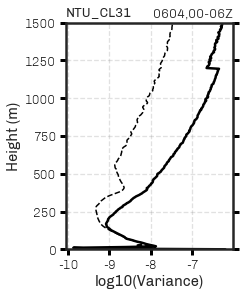

In [4]:
var_o = np.var((np.asarray(backscatter[3][0:720*6,0:300])), axis=0)
var_s = np.var((hs_cl31_smoo[0:720*6,0:300]), axis=0)

fig = plt.figure(figsize=(3.65,4.35))
ax = fig.add_subplot(1,1,1)
plt.plot(np.log10(var_o),np.linspace(0,299,300)*5,c='k',lw=2.5)
plt.plot(np.log10(var_s),np.linspace(0,299,300)*5,c='k',lw=1.5,linestyle='--')
ax.set_yticks([0,250,500,750,1000,1250,1500])
ax.set_xticks([-10,-9,-8,-7])
ax.set_xticklabels([-10,-9,-8,-7],fontproperties=prop,fontsize=13.5)
for text_obj in ax.get_xticklabels():
    text_obj.set_fontproperties(fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Thin.ttf',size=12.5))
for text_obj in ax.get_yticklabels():
    text_obj.set_fontproperties(fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Thin.ttf',size=12.5))
ax.tick_params(direction='out',length=6,width=3,colors='k',right=True,left=True,bottom=True)
ax.grid(ls='--',c='gray',lw=1.3,alpha=0.23)

plt.ylim(0,1500)
#plt.xlim(-4,-3.25)
plt.xlabel('log10(Variance)',fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),
              fontsize=14.65)
plt.ylabel('Height (m)',fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),
              fontsize=14.65)
plt.title('0604,00-06Z',
          fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Light.ttf'),loc='right',
         fontsize=13.03)
plt.title('NTU_CL31',
          fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),loc='left',
         fontsize=13.03)
plt.tight_layout()
plt.show()

/scra6/ft21894/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


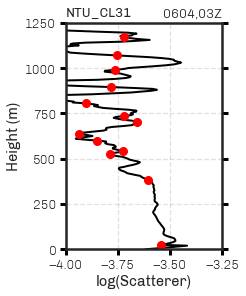

In [5]:
warnings.filterwarnings("ignore",category=RuntimeWarning)
from scipy.signal import find_peaks
x = np.gradient(gaussian_filter(np.log10(hs_cl31_smoo[550,0:600]),0.1),np.linspace(0,599,600)*5)
x[x>-0.005] = 0 #Filter positive and very small negative oscillations
peaks, _ = find_peaks(-x)

fig = plt.figure(figsize=(3.65,4.35))
ax = fig.add_subplot(1,1,1)
plt.plot(gaussian_filter(np.log10(hs_cl31_smoo[720*3,0:600]),0.1),np.linspace(0,599,600)*5,c='k',lw=2)
         #,np.linspace(0,299,300)*5,c='k',lw=2.5)
#plt.plot(np.ma.masked_greater(np.gradient(gaussian_filter(np.log10(hs_cl31_smoo[720*1,0:300]),1),
#                                          np.linspace(0,299,300)*5),0),c='r',lw=2.5)
plt.plot(gaussian_filter(np.log10(hs_cl31_smoo[720*3,0:600]),0.1)[peaks],peaks*5,"o",mfc='r',mec='r',ms=8)
ax.set_yticks([0,250,500,750,1000,1250,1500])
for text_obj in ax.get_xticklabels():
    text_obj.set_fontproperties(fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Thin.ttf',size=12.5))
ax.set_xticks([-4,-3.75,-3.5,-3.25])
for text_obj in ax.get_yticklabels():
    text_obj.set_fontproperties(fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Thin.ttf',size=12.5))
ax.tick_params(direction='out',length=6,width=3,colors='k',right=True,left=True,bottom=True)
ax.grid(ls='--',c='gray',lw=1.3,alpha=0.23)

plt.ylim(0,1250)
plt.xlim(-4,-3.25)
plt.xlabel(r'log(Scatterer)',fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),
              fontsize=14.65)
plt.ylabel('Height (m)',fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),
              fontsize=14.65)
plt.title('0604,03Z',
          fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Light.ttf'),loc='right',
         fontsize=13.03)
plt.title('NTU_CL31',
          fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),loc='left',
         fontsize=13.03)
plt.tight_layout()
plt.show()

/scra6/ft21894/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


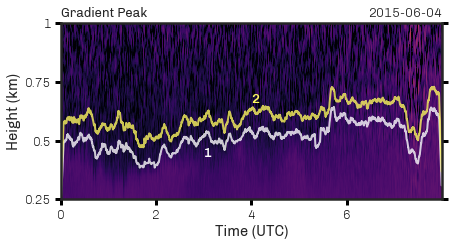

In [16]:
gradient0604 = peak_finding.gradient_method(hs_cl31_smoo[0:720*8,0:600],np.linspace(0,599,600)).gradient_peak()

xylim=[0,720*8,0,600]
fig = plt.figure(figsize=(6.55,3.65))
ax = fig.add_subplot(1,1,1)
color = ['#ff94ab','w','#fffa5e','#ffd166','#ff8fdb']
plt.pcolormesh(np.log10(hs_cl31_smoo)[:,xylim[2]:xylim[3]].transpose(),cmap='inferno',vmin=-4,vmax=-1.75,zorder=0)
        
for i in [1,2]:
    plt.plot(np.linspace(xylim[0],xylim[1]-1,xylim[1]-xylim[0])[:],          
             ceilometer_help.smooth(gaussian_filter(np.ma.masked_greater(gradient0604[:,i],300),0.1)[:],80),
             lw=2,alpha=0.79,c=color[i])
ax.set_yticks([0,50,100,150,200,300,400,500,600])
ax.set_yticklabels([0,0.25,0.5,0.75,1,1.5,2,2.5,3],fontproperties=prop,fontsize=13.5)
ax.set_xticks([0,720*2,720*4,720*6,720*9,720*12,720*15,720*18,720*21,720*24])
ax.set_xticklabels([0,2,4,6,9,12,15,18,21,24],fontproperties=prop,fontsize=13.5)    
ax.tick_params(direction='out',length=6,width=3,colors='k',right=True,left=True,bottom=True)
for text_obj in ax.get_xticklabels():
    text_obj.set_fontproperties(fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Thin.ttf',size=12.5))
for text_obj in ax.get_yticklabels():
    text_obj.set_fontproperties(fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Thin.ttf',size=12.5))
plt.text(720*3, 86, '1', color='w', rotation=0, rotation_mode='anchor',size=13,fontproperties=\
         fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Medium.ttf',size=16))
plt.text(720*4, 132, '2', color='#fffa5e', rotation=0, rotation_mode='anchor',size=13,fontproperties=\
         fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Medium.ttf',size=16))
plt.xlim(xylim[0],xylim[1])
plt.ylim(50,200)
plt.xlabel(r'Time (UTC)',fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),
              fontsize=14.65)
plt.ylabel('Height (km)',fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),
              fontsize=14.65)
plt.title('2015-06-04',
          fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Light.ttf'),loc='right',
         fontsize=13.03)
plt.title('Gradient Peak',
          fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),loc='left',
         fontsize=13.03)
plt.tight_layout()
plt.show()

In [17]:
class CWT_transform(object):
    
    def __init__(self, scatterer=None):
        self.scatterer=scatterer
    
    def CWT_peaks(self,a=None,TYPE='haar',peak_distance=30):
        from scipy.ndimage.filters import gaussian_filter
        from scipy.signal import find_peaks
        
        #Gaussian filter
        A = gaussian_filter(np.log10(self.scatterer),0.75)
        #Integrate Wavelet Covariance
        if TYPE=='haar':
            haar_CWT = np.zeros_like(A)
            A[np.isnan(A)] = 0
            
            for i in range(A.shape[0]):
                haar_CWT[i] = np.trapz(A[i:]*ceilometer_help.myhaar(a=a,b=i,
                                                                    inputarray=self.scatterer)[i:],
                                       x=np.linspace(0,A.shape[0]-1,A.shape[0])[i:]*5)
        #Find peak locations
        peaksCWT, _ = find_peaks(gaussian_filter(haar_CWT,1.08),distance=peak_distance)
        return haar_CWT,peaksCWT
    
        if TYPE=='mxh':
            mxh_CWT = np.zeros_like(A)
            A[np.isnan(A)] = 0
            
            for i in range(A.shape[0]):
                mxh_CWT[i] = np.trapz(A[i:]*ceilometer_help.mymxh(a=a,b=i,inputarray=self.scatterer)[i:],
                                      x=np.linspace(0,A.shape[0]-1,A.shape[0])[i:]*5)
        peaksCWT, _ = find_peaks(gaussian_filter(mxh_CWT,1.08),distance=peak_distance)    
        return mxh_CWT,peaksCWT        
    
    def clean_peak(self,peakloc=None,TYPE=None,zero_loc=None):
        
        CWT0_5copy = np.copy(peakloc)
        
        # Sudden jump adjustment
        if TYPE=='SUDDEN':
            for i in range(peakloc.shape[0]-1):
                if (CWT0_5copy[i+1,0]-CWT0_5copy[i,0]>20): #Sudden Jump
                    CWT0_5copy[i+1,3] = CWT0_5copy[i+1,2]
                    CWT0_5copy[i+1,2] = CWT0_5copy[i+1,1]
                    CWT0_5copy[i+1,1] = CWT0_5copy[i+1,0]
                    CWT0_5copy[i+1,0] = CWT0_5copy[i,0]
        elif TYPE=='NO_ZERO':
            for i in range(peakloc.shape[0]-1):
                if (CWT0_5copy[i,0]>zero_loc):
                    CWT0_5copy[i,3]  = CWT0_5copy[i,2]
                    CWT0_5copy[i,2]  = CWT0_5copy[i,1]
                    CWT0_5copy[i,1]  = CWT0_5copy[i,0]
                    CWT0_5copy[i,0]  = np.nan#np.mean(np.ma.masked_greater(CWT0_5copy,zero_loc))
        return CWT0_5copy
    
    def KDE_manual(self,xinfo=None,yinfo=None,peakloc=None,peaklocINDEX=None):
        import scipy.stats as st
        xmin, xmax = xinfo[0],xinfo[1]#0, 720*8
        ymin, ymax = yinfo[0],yinfo[1]#0, 300
        
        # Peform the kernel density estimate
        yy,xx = np.mgrid[ymin:ymax-1:yinfo[2], xmin:xmax-1:xinfo[2]] #300j,200j
        positions = np.vstack([xx.ravel(), yy.ravel()])
        values = np.vstack([np.linspace(0,peakloc.shape[0]-1,peakloc.shape[0]),
                            np.ma.masked_greater(peakloc[:,peaklocINDEX],300)])
        kernel = st.gaussian_kde(values)
        f = np.reshape(kernel(positions).T, xx.shape)
        
        #KDE maximum location
        argmax_f = []
        for i in range(xinfo[3]):
            argmax_f.append(f[:,i].argmax())
            
        return f,np.asarray(argmax_f),np.interp(np.linspace(0,peakloc.shape[0]-1,peakloc.shape[0]),
                                                np.linspace(0,peakloc.shape[0]-1,xinfo[3]),np.asarray(argmax_f))

/scra6/ft21894/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/scra6/ft21894/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


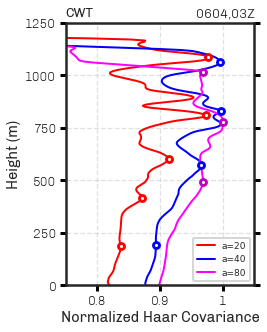

In [24]:
CWT20,peaks20 = CWT_transform(hs_cl31_smoo[720*3,0:600]).CWT_peaks(a=20)
CWT40,peaks40 = CWT_transform(hs_cl31_smoo[720*3,0:600]).CWT_peaks(a=40)
CWT80,peaks80 = CWT_transform(hs_cl31_smoo[720*3,0:600]).CWT_peaks(a=80)

fig = plt.figure(figsize=(3.95,4.85))

ax = fig.add_subplot(1,1,1)
plt.plot(gaussian_filter(CWT20/np.max(CWT20),1.08),np.linspace(0,599,600)*5,c='r',lw=2,
        label='a=20')
plt.plot(gaussian_filter(CWT40/np.max(CWT40),1.08),np.linspace(0,599,600)*5,c='b',lw=2,
        label='a=40')
plt.plot(gaussian_filter(CWT80/np.max(CWT80),1.08),np.linspace(0,599,600)*5,c='magenta',lw=2,
        label='a=80')
plt.plot(gaussian_filter(CWT80/np.max(CWT80),1.08)[peaks80],peaks80*5,c='magenta',
        marker='o',mew=2.85,mfc='w',mec='m',lw=0,ms=6)
plt.plot(gaussian_filter(CWT40/np.max(CWT40),1.08)[peaks40],peaks40*5,c='b',
        marker='o',mew=2.85,mfc='w',mec='b',lw=0,ms=6)
plt.plot(gaussian_filter(CWT20/np.max(CWT20),1.08)[peaks20],peaks20*5,c='r',
        marker='o',mew=2.85,mfc='w',mec='r',lw=0,ms=6)

ax.legend(loc=4,fontsize=9)
ax.set_yticks([0,250,500,750,1000,1250])
ax.set_yticklabels([0,250,500,750,1000,1250],fontproperties=prop,fontsize=13.5)
ax.set_xticks([0.8,0.9,1])
ax.set_xticklabels([0.8,0.9,1],fontproperties=prop,fontsize=13.5)
for text_obj in ax.get_xticklabels():
    text_obj.set_fontproperties(fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Thin.ttf',size=12.5))
for text_obj in ax.get_yticklabels():
    text_obj.set_fontproperties(fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Thin.ttf',size=12.5))

ax.tick_params(direction='out',length=6,width=3,colors='k',right=True,left=True,bottom=True)
ax.grid(ls='--',c='gray',lw=1.3,alpha=0.23)

plt.ylim(0,1250)
plt.xlim(0.75,1.05)
plt.xlabel(r'Normalized Haar Covariance',fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),
              fontsize=14.65)
plt.ylabel('Height (m)',fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),
              fontsize=14.65)
plt.title('0604,03Z',
          fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Light.ttf'),loc='right',
         fontsize=13.03)
plt.title('CWT',
          fontproperties=fm.FontProperties(fname='/scra6/ft21894/anaconda3/font/Chivo/ttf/Chivo-Regular.ttf'),loc='left',
         fontsize=13.03)
plt.tight_layout()
plt.show()